<a href="https://colab.research.google.com/github/madhushanchathuranga/AndroidHealthcareProject/blob/main/corn_disease_detection_vgg16_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct  2 03:04:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.17.0'

In [5]:
#import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [6]:
#re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Train'
valid_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Validation'

In [7]:
#import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [8]:
#don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [9]:
#useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Research_TG507/split_dataset/Train')

In [10]:
#our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 127, 127, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,876,513 (83.45 MB)

 Trainable params: 73,729 (288.00 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

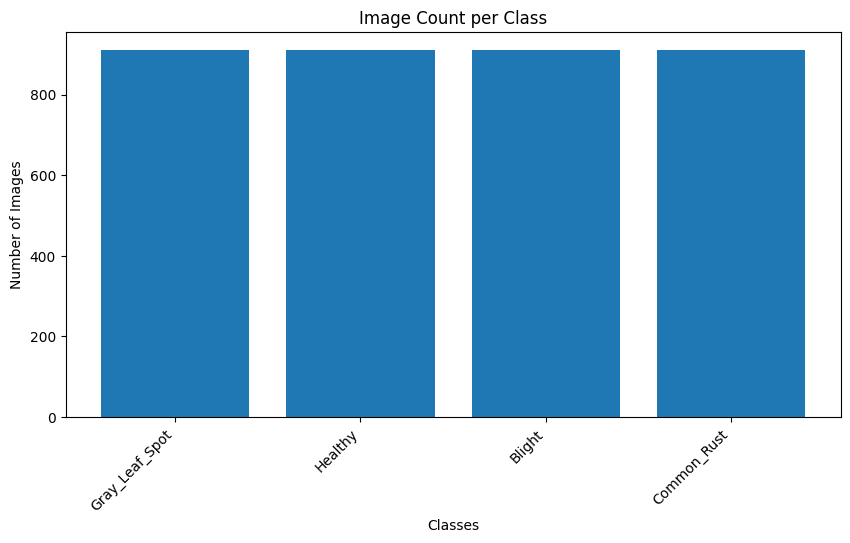

In [14]:
# prompt: show 4 classes and image count in using matplot lib

import matplotlib.pyplot as plt
import os

train_folders = glob('/content/drive/MyDrive/Research_TG507/split_dataset/Train/*')
class_names = [os.path.basename(folder) for folder in train_folders]
image_counts = [len(os.listdir(folder)) for folder in train_folders]

# Show only the first 4 classes
num_classes_to_show = 4
plt.figure(figsize=(10, 5))
plt.bar(class_names[:num_classes_to_show], image_counts[:num_classes_to_show])
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
#use the image data generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
#make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research_TG507/split_dataset/Train/',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'sparse'
                                                 )

Found 3640 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research_TG507/split_dataset/Test/',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'sparse'
                                                 )

Found 780 images belonging to 4 classes.


In [18]:
pip install --upgrade tensorflow

In [19]:
# Assuming 'folders' is a list of your class names or directories (4 classes)
x = Flatten()(inception.output)
prediction = Dense(4, activation='softmax')(x)  # Updated the output layer to match 4 classes
model = Model(inputs=inception.input, outputs=prediction)


In [22]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set)
)


Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 84s 352ms/step - accuracy: 0.8483 - loss: 1.8603 - val_accuracy: 0.8654 - val_loss: 1.7455
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8654 - val_loss: 1.7455
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 132s 338ms/step - accuracy: 0.8825 - loss: 1.4131 - val_accuracy: 0.8538 - val_loss: 2.5799
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8538 - val_loss: 2.5799
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 79s 338ms/step - accuracy: 0.8909 - loss: 1.6996 - val_accuracy: 0.8474 - val_loss: 2.9750
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8474 - val_loss: 2.9750
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 131s 335ms/step - accuracy: 0.8832 - loss: 1.9550 - val_accuracy: 0.8628 - val_loss: 3.0187
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accur

In [23]:
# prompt: save the model in international format

import tensorflow as tf

# Save the model in the SavedModel format
tf.saved_model.save(model, '/content/drive/MyDrive/Research_TG507/models/vgg16_v2')


In [51]:
# prompt: show accuracy and lost using table

import pandas as pd

# Assuming 'r' is the history object returned by model.fit
df = pd.DataFrame(r.history)
print(df[['accuracy', 'loss', 'val_accuracy', 'val_loss']])

    accuracy      loss  val_accuracy  val_loss
0   0.856319  1.854655      0.865385  1.745538
1   0.000000  0.000000      0.865385  1.745538
2   0.882143  1.510007      0.853846  2.579884
3   0.000000  0.000000      0.853846  2.579884
4   0.887637  1.862274      0.847436  2.975004
5   0.000000  0.000000      0.847436  2.975003
6   0.899725  1.691617      0.862821  3.018707
7   0.000000  0.000000      0.862821  3.018708
8   0.913462  1.436904      0.873077  2.893700
9   0.000000  0.000000      0.873077  2.893699
10  0.916209  1.452081      0.806410  6.787553
11  0.000000  0.000000      0.806410  6.787551
12  0.919505  1.416183      0.889744  3.228691
13  0.000000  0.000000      0.889744  3.228691
14  0.935165  1.218792      0.852564  4.546428
15  0.000000  0.000000      0.852564  4.546428
16  0.935440  1.161776      0.912821  2.195939
17  0.000000  0.000000      0.912821  2.195939
18  0.952473  0.784123      0.920513  1.964054
19  0.000000  0.000000      0.920513  1.964054


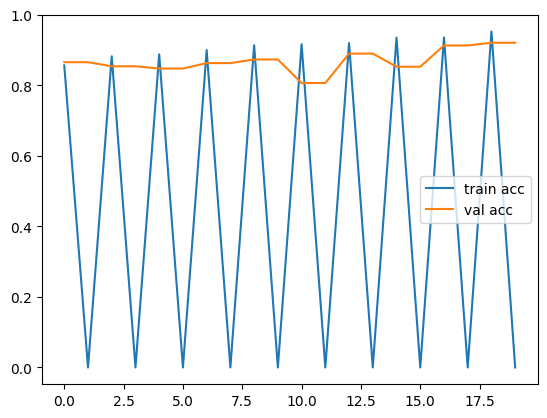

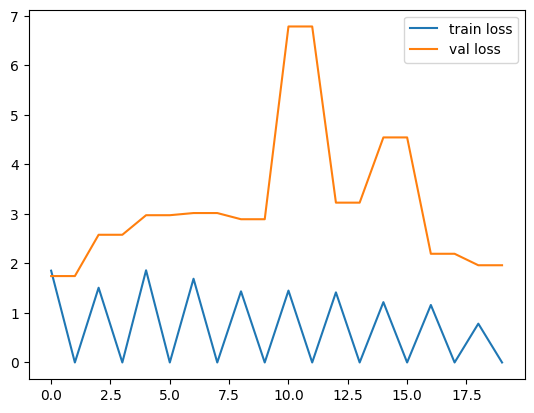

<Figure size 640x480 with 0 Axes>

In [24]:
# prompt: show the diagram accuracy and lost using graph

import matplotlib.pyplot as plt

# Assuming 'r' is the history object returned by model.fit
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted label: Blight
Prediction probabilities: [[9.9998498e-01 1.4972111e-05 3.6876991e-40 0.0000000e+00]]


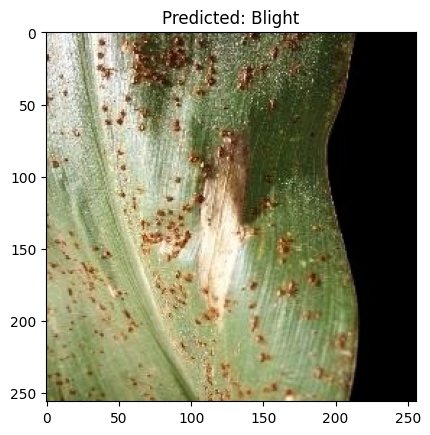

In [27]:
# prompt: i need to test images with model predition

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # Normalize the image

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Get the class label from the training set
  class_labels = training_set.class_indices
  label_map = {v: k for k, v in class_labels.items()}
  predicted_label = label_map[predicted_class]

  return predicted_label, prediction

# Example usage
image_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Test/Blight/Corn_Blight   (5).jpg'
predicted_label, prediction = predict_image(image_path, model)

print("Predicted label:", predicted_label)
print("Prediction probabilities:", prediction)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted label: Gray_Leaf_Spot
Prediction probabilities: [[3.5404095e-19 3.0636948e-02 9.6936303e-01 8.6880505e-43]]


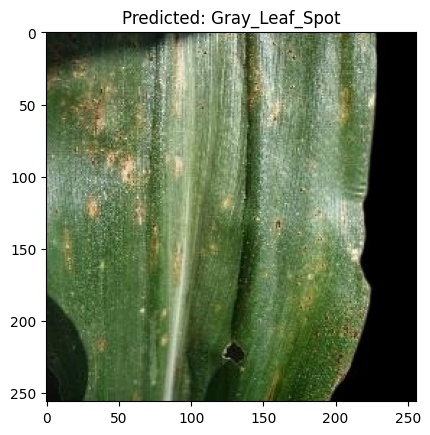

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # Normalize the image

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Get the class label from the training set
  class_labels = training_set.class_indices
  label_map = {v: k for k, v in class_labels.items()}
  predicted_label = label_map[predicted_class]

  return predicted_label, prediction

# Example usage
image_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Test/Gray_Leaf_Spot/Corn_Gray_Spot  (10).jpg'
predicted_label, prediction = predict_image(image_path, model)

print("Predicted label:", predicted_label)
print("Prediction probabilities:", prediction)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted label: Healthy
Prediction probabilities: [[0. 0. 0. 1.]]


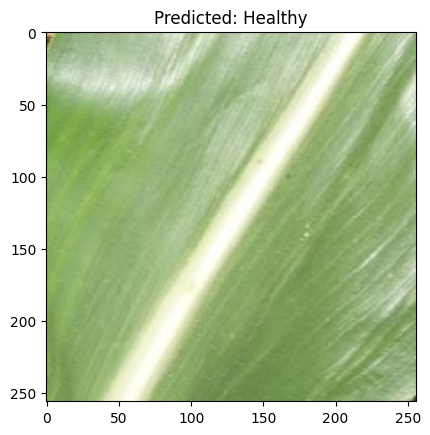

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # Normalize the image

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Get the class label from the training set
  class_labels = training_set.class_indices
  label_map = {v: k for k, v in class_labels.items()}
  predicted_label = label_map[predicted_class]

  return predicted_label, prediction

# Example usage
image_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Test/Healthy/Corn_Health  (10).jpg'
predicted_label, prediction = predict_image(image_path, model)

print("Predicted label:", predicted_label)
print("Prediction probabilities:", prediction)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted label: Blight
Prediction probabilities: [[1.0000000e+00 3.1919575e-20 1.8090410e-14 1.7714826e-35]]


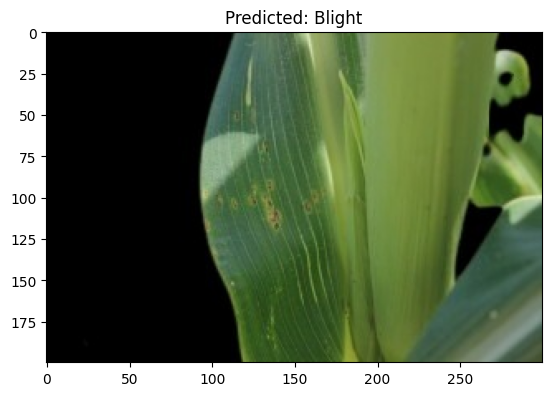

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # Normalize the image

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Get the class label from the training set
  class_labels = training_set.class_indices
  label_map = {v: k for k, v in class_labels.items()}
  predicted_label = label_map[predicted_class]

  return predicted_label, prediction

# Example usage
image_path = '/content/drive/MyDrive/Research_TG507/split_dataset/Test/Common_Rust/Corn_Common_Rust   (11).jpg'
predicted_label, prediction = predict_image(image_path, model)

print("Predicted label:", predicted_label)
print("Prediction probabilities:", prediction)

# Display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()

In [32]:
model.save('/content/drive/MyDrive/Research_TG507/models/vgg_model.h5')  # Saves the whole model (architecture + weights + optimizer state)


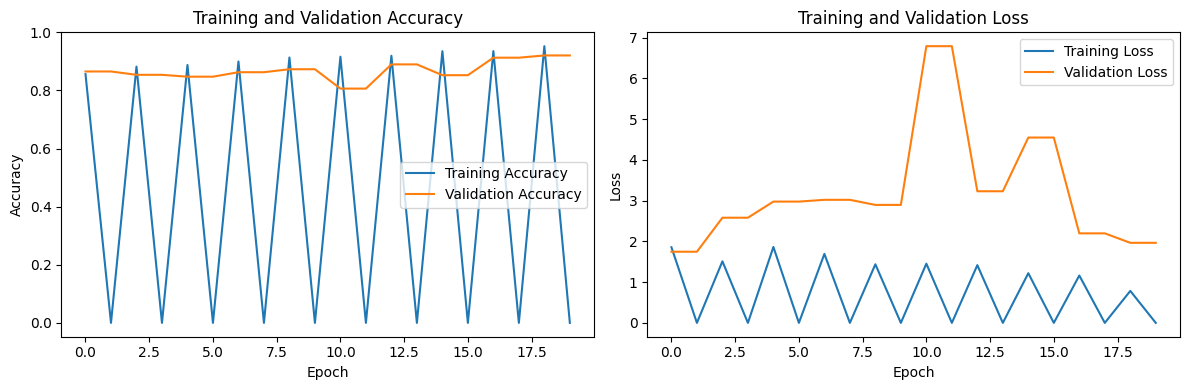

In [33]:
# prompt: model accuracy data loss train , test and validation in graph

import matplotlib.pyplot as plt

# Assuming 'r' is the history object returned by model.fit
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# prompt: model accuracy

# Assuming 'r' is the history object returned by model.fit
print("Best validation accuracy:", max(r.history['val_accuracy']))


Best validation accuracy: 0.9205127954483032


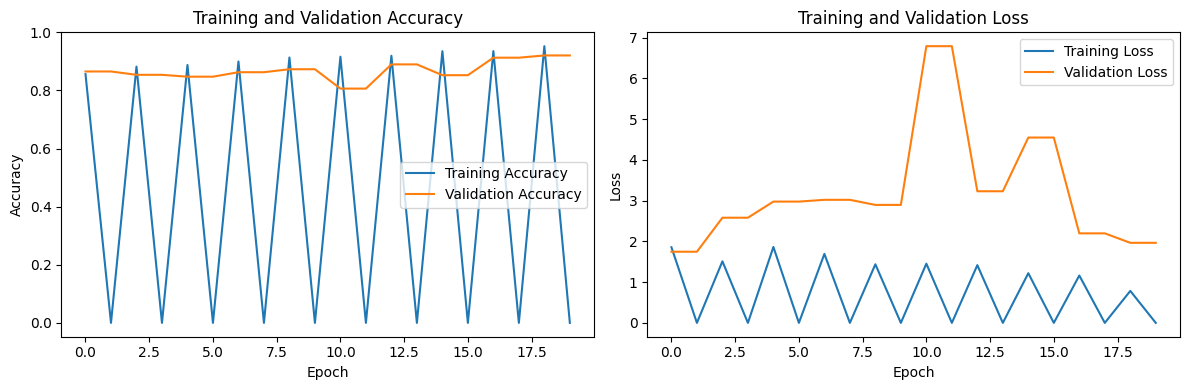

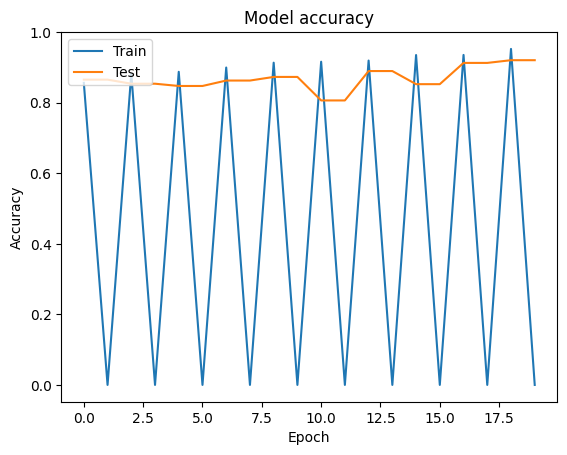

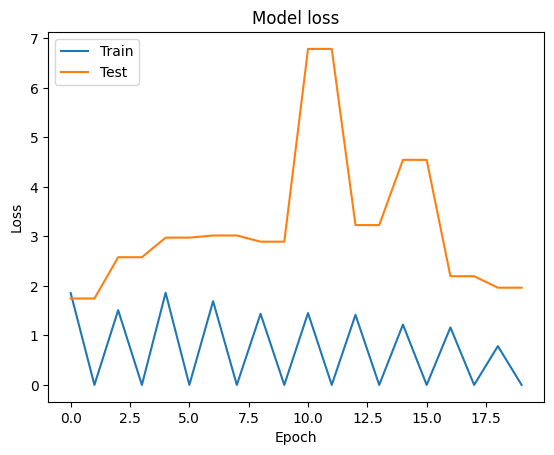

In [35]:
# prompt: generate all graphs

import matplotlib.pyplot as plt
# Assuming 'r' is the history object returned by model.fit
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training & validation accuracy values
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [36]:
# prompt: print test accuracy

# Assuming 'r' is the history object returned by model.fit
print("Test accuracy:", r.history['val_accuracy'][-1])


Test accuracy: 0.9205127954483032


In [37]:
# prompt: i want to test the model

# Assuming you have already loaded your model and have the test_set defined

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# You can also use model.predict to get predictions on new data
# Example:
# predictions = model.predict(test_set)
# print(predictions)


49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9234 - loss: 1.9265
Test Loss: 1.9640544652938843
Test Accuracy: 0.9205127954483032


49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step


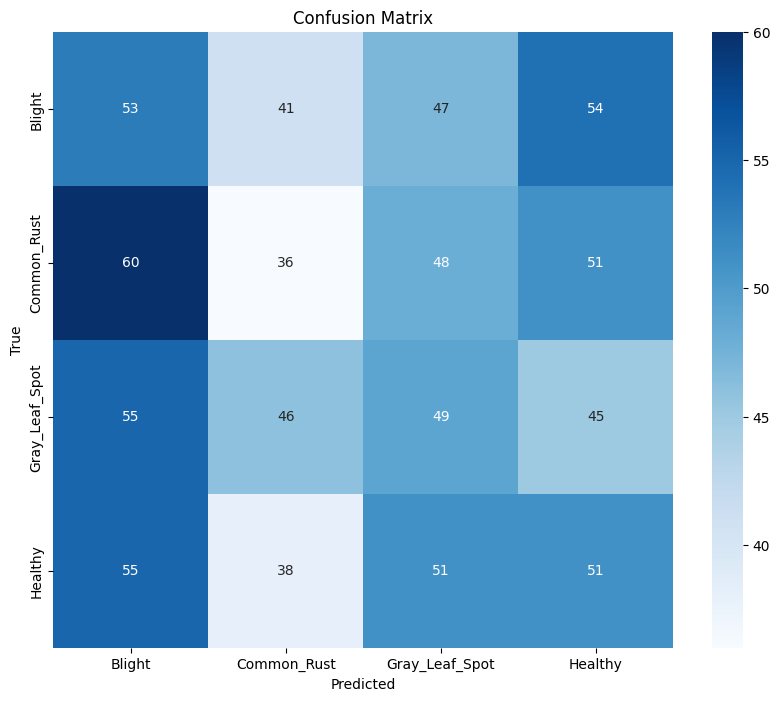

In [38]:
# prompt: Confusion Matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the test set
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels for the test set
Y_true = test_set.classes

# Compute the confusion matrix
cm = confusion_matrix(Y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


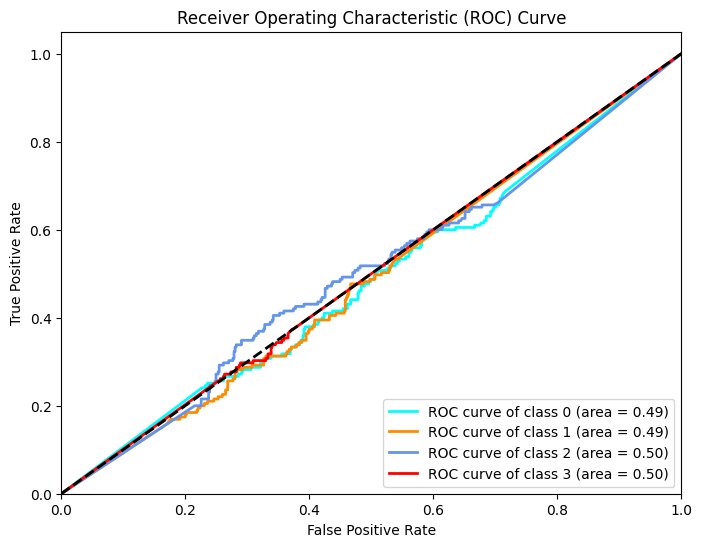

In [39]:
# prompt: ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Assuming Y_pred contains the predicted probabilities for each class
# and Y_true contains the true labels (one-hot encoded)

# Get number of classes
num_classes = len(test_set.class_indices)

# Create an array of colors for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

# Initialize lists to store ROC curve data for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true == i, Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


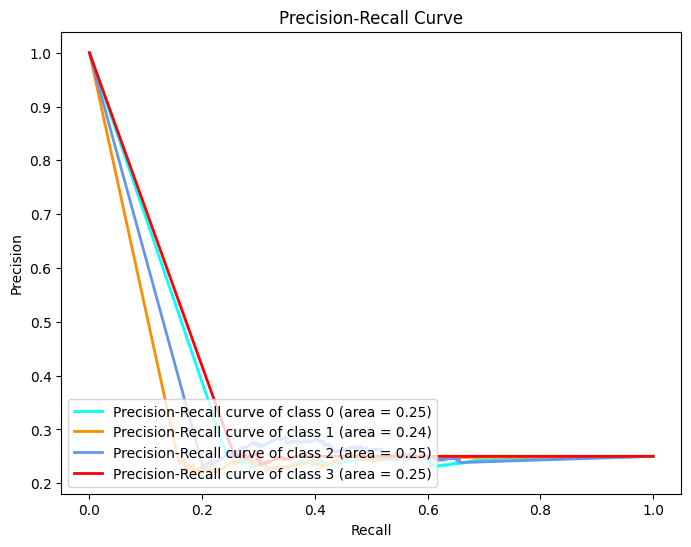

In [40]:
# prompt: Precision-Recall Curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Assuming Y_pred contains the predicted probabilities for each class
# and Y_true contains the true labels (one-hot encoded)

# Get number of classes
num_classes = len(test_set.class_indices)

# Create an array of colors for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

# Initialize lists to store precision-recall curve data for each class
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision-recall curve and average precision for each class
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_true == i, Y_pred[:, i])
    average_precision[i] = average_precision_score(Y_true == i, Y_pred[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i, color in zip(range(num_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


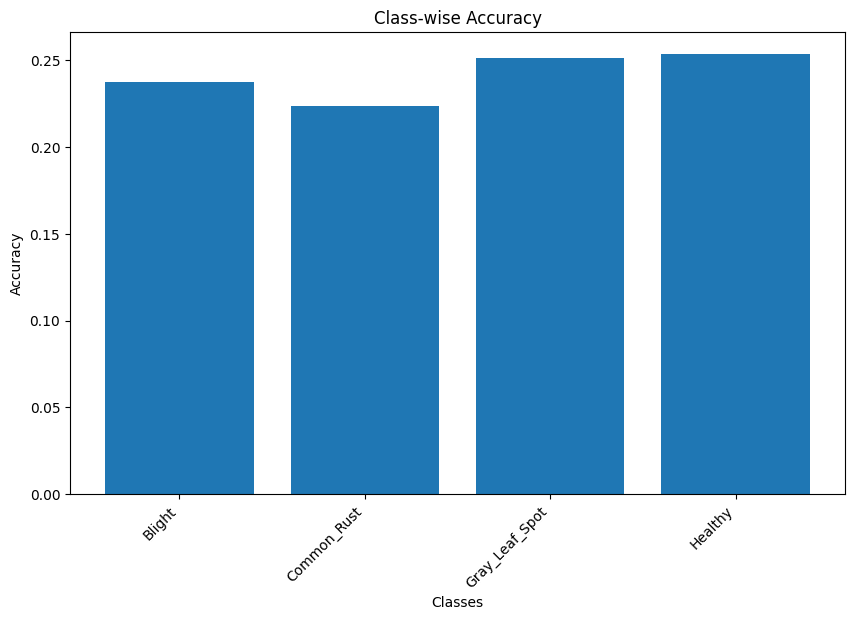

In [42]:
# prompt: Class-wise Accuracy Bar Plot

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming Y_true contains true labels and y_pred contains predicted labels
report = classification_report(Y_true, y_pred, target_names=test_set.class_indices, output_dict=True)

# Extract class-wise accuracy
class_accuracies = {cls: report[cls]['precision'] for cls in test_set.class_indices}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()


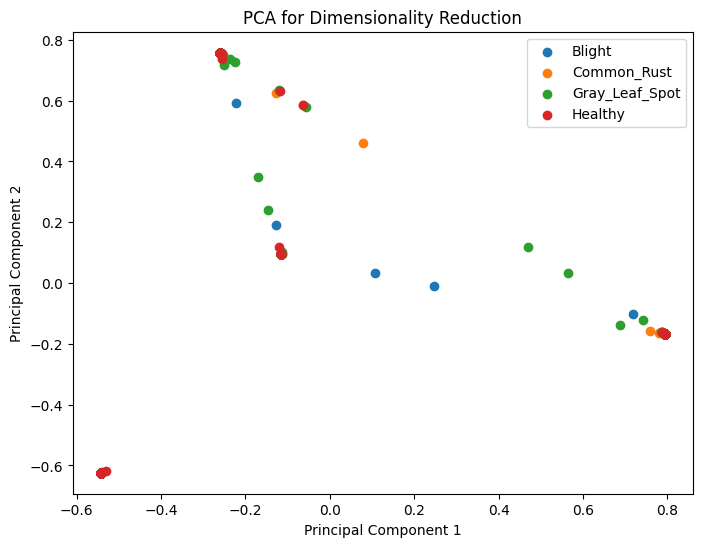

In [46]:
# prompt: Scatter Plot or PCA for Dimensionality Reduction

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming Y_pred contains the predicted probabilities for each class
# and Y_true contains the true labels (one-hot encoded)

# Get number of classes
num_classes = len(test_set.class_indices)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(Y_pred)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.scatter(X_pca[Y_true == i, 0], X_pca[Y_true == i, 1], label=list(test_set.class_indices.keys())[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Dimensionality Reduction')
plt.legend()
plt.show()

In [52]:
import pandas as pd

# Example data (you can replace these with your actual results)
data = {
    'epoch': [1, 2, 3, 4, 5],  # Replace with actual epoch numbers
    'train_accuracy': [0.80, 0.85, 0.88, 0.90, 0.92],  # Replace with actual training accuracy values
    'val_accuracy': [0.78, 0.83, 0.85, 0.88, 0.90],  # Replace with actual validation accuracy values
    'train_loss': [0.50, 0.40, 0.35, 0.30, 0.28],  # Replace with actual training loss values
    'val_loss': [0.55, 0.45, 0.40, 0.35, 0.33]  # Replace with actual validation loss values
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/Research_TG507/models/vgg16_results.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.
